# Region Perturbation

Demo of Region Perturbation algorithm with inpainting and random perturbation modes.

In [1]:
%load_ext autoreload
%autoreload 2

## LRP

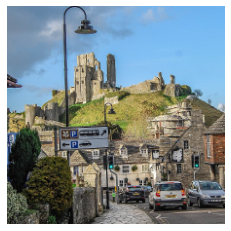

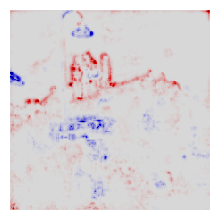

In [2]:
from typing import Callable, Dict, List, Tuple, Union

import numpy
import torch
import torchvision
from matplotlib import pyplot as plt

import lrp.plot
from lrp import image, rules
from lrp.core import LRP
from lrp.filter import LayerFilter
from lrp.rules import LrpEpsilonRule, LrpGammaRule, LrpZBoxRule, LrpZeroRule
from lrp.zennit.types import AvgPool, Linear

# Input data
# Image is in RGB mode with range [0,1]
img_bgr_hwc_float_0_1: numpy.array = image.load_img_norm_zero_one(
    '../../../data/castle.jpg')
X = lrp.norm.ImageNetNorm.transform(img_bgr_hwc_float_0_1)
# Simulate batch by adding a new dimension
X = torch.unsqueeze(X, 0)

plt.axis('off')
lrp.plot.plot_imagenet(X)

# Model
model = torchvision.models.vgg16(pretrained=True)
model.eval()

# Low and high parameters for zB-rule
batch_size: int = 1
shape: Tuple[int] = (batch_size, 3, 224, 224)

low: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.zeros(*shape))
high: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.ones(*shape))

# Init layer filter
vgg16_target_types: Tuple[type] = (Linear, AvgPool)
filter_by_layer_index_type: LayerFilter = LayerFilter(model)
filter_by_layer_index_type.set_target_types(vgg16_target_types)

name_map: List[Tuple[List[str], rules.LrpRule,
                     Dict[str, Union[torch.Tensor, float]]]]
name_map = [
    (filter_by_layer_index_type(lambda n: n == 0), LrpZBoxRule, {'low': low, 'high': high}),
    (filter_by_layer_index_type(lambda n: 1 <= n <= 16), LrpGammaRule, {'gamma': 0.25}),
    (filter_by_layer_index_type(lambda n: 17 <= n <= 30), LrpEpsilonRule, {'epsilon': 0.25}),
    (filter_by_layer_index_type(lambda n: 31 <= n), LrpZeroRule, {}),
]

lrp_instance: LRP = LRP(model)
lrp_instance.convert_layers(name_map)
R: torch.Tensor = lrp_instance.relevance(X)
lrp_instance.heatmap(R, width=2, height=2)

## Region Perturbation

Try Region Perturbation with inpainting enabled.

Finished '_flip' in 0.1606 secs
Finished '_flip' in 0.1497 secs
Finished '_flip' in 0.1582 secs
Finished '_flip' in 0.1478 secs
Finished '_flip' in 0.1595 secs
Finished '_flip' in 0.1510 secs
Finished '_flip' in 0.1636 secs
Finished '_flip' in 0.1552 secs
Finished '_flip' in 0.1554 secs
Finished '_flip' in 0.1549 secs
Finished '_flip' in 0.1558 secs
Finished '_flip' in 0.1559 secs
Finished '_flip' in 0.1567 secs
Finished '_flip' in 0.1555 secs
Finished '_flip' in 0.1538 secs
Finished '_flip' in 0.1585 secs
Finished '_flip' in 0.1633 secs
Finished '_flip' in 0.1731 secs
Finished '_flip' in 0.1633 secs
Finished '_flip' in 0.1586 secs
Finished '_flip' in 0.1628 secs
Finished '_flip' in 0.1561 secs
Finished '_flip' in 0.1667 secs
Finished '_flip' in 0.1720 secs
Finished '_flip' in 0.1737 secs
Finished '_flip' in 0.1680 secs
Finished '_flip' in 0.1681 secs
Finished '_flip' in 0.1537 secs
Finished '__call__' in 4.6745 secs


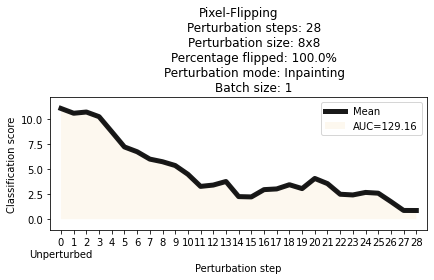

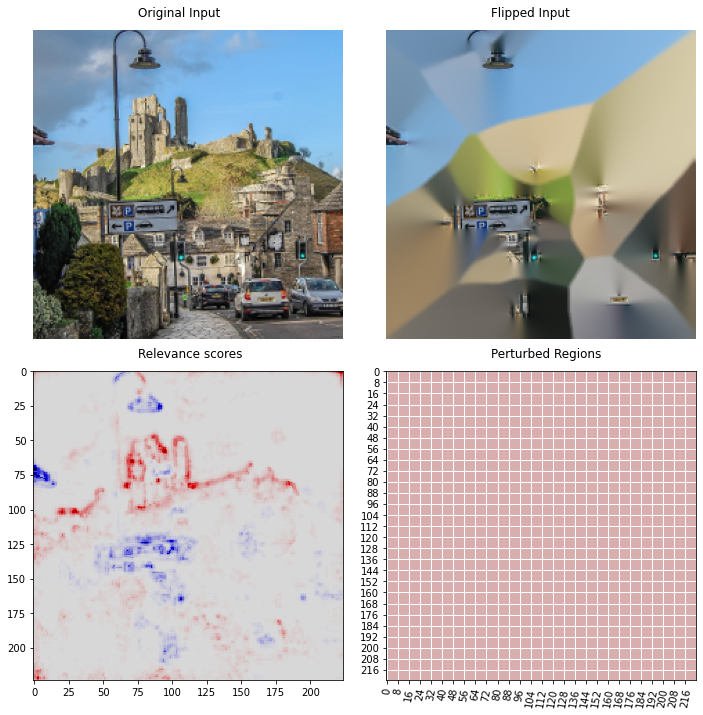

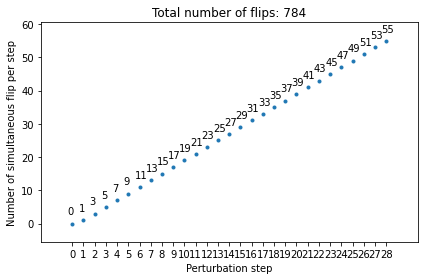

In [3]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 28
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.INPAINTING)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()

Finished '_flip' in 0.1483 secs
Finished '_flip' in 0.1525 secs
Finished '_flip' in 0.1452 secs
Finished '_flip' in 0.1445 secs
Finished '_flip' in 0.1425 secs
Finished '_flip' in 0.1421 secs
Finished '_flip' in 0.1442 secs
Finished '_flip' in 0.1461 secs
Finished '_flip' in 0.1542 secs
Finished '_flip' in 0.1609 secs
Finished '_flip' in 0.1415 secs
Finished '_flip' in 0.1447 secs
Finished '_flip' in 0.1443 secs
Finished '_flip' in 0.1449 secs
Finished '_flip' in 0.1458 secs
Finished '_flip' in 0.1432 secs
Finished '_flip' in 0.1443 secs
Finished '_flip' in 0.1445 secs
Finished '_flip' in 0.1478 secs
Finished '_flip' in 0.1445 secs
Finished '_flip' in 0.1450 secs
Finished '_flip' in 0.1477 secs
Finished '_flip' in 0.1463 secs
Finished '_flip' in 0.1484 secs
Finished '_flip' in 0.1462 secs
Finished '_flip' in 0.1449 secs
Finished '_flip' in 0.1469 secs
Finished '_flip' in 0.1518 secs
Finished '__call__' in 4.2711 secs


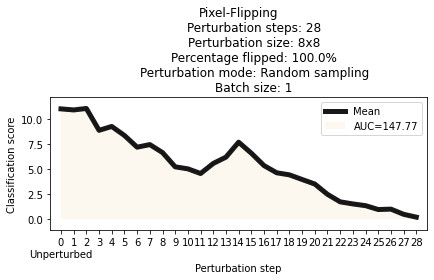

WARNING   Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


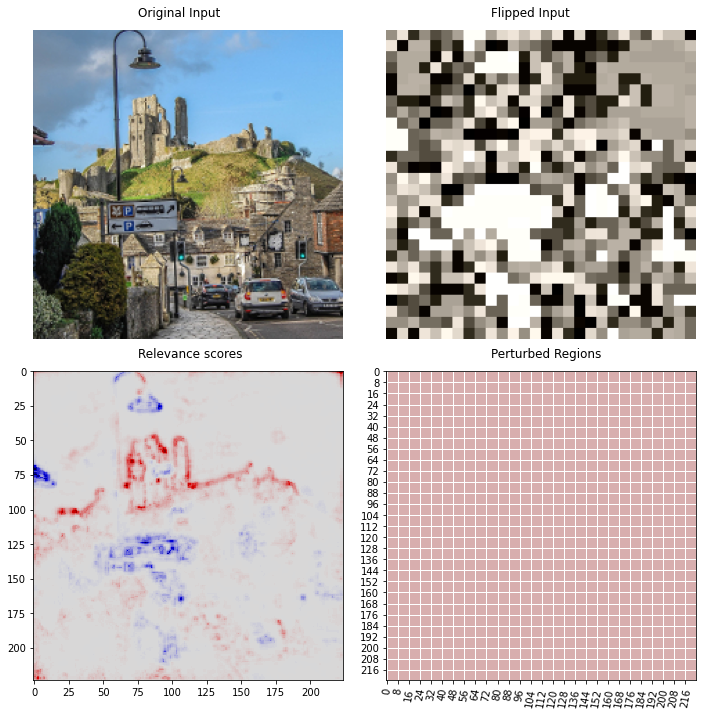

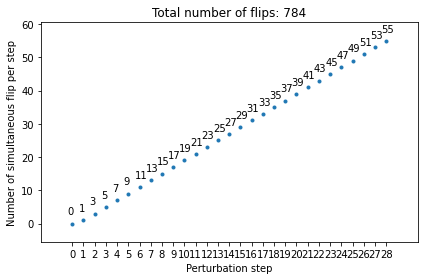

In [4]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 28
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.RANDOM)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()